# Analyse Exploratoire des Ventes de Walmart 

Vous avez dans le fichier zip ci-joint un dossier contenant des données de ventes d'une entreprise sur l'année 2019. Vous avez un fichier csv par mois.
Chaque fichier contient les colonnes suivantes:
* OrderID: l'id de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date
* Purchase adress: l'adresse de la boutique de vente

Vous êtes appelé à analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?

Accompagnez vos solutions de visualisations parlantes afin d'aider le business à améliorer ses chiffres de l'année suivante.



## Importer les données

Essayons de Monter notre google drive

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
data = "/gdrive/My Drive/DataKev/data/Sales_Data/"

In [3]:
import os

In [6]:
os.listdir(data)

['Analyse_Exploratoire.ipynb',
 'Sales_July_2019.csv',
 'Sales_March_2019.csv',
 'Sales_April_2019.csv',
 'Sales_December_2019.csv',
 'Sales_November_2019.csv',
 'Sales_January_2019.csv',
 'Sales_May_2019.csv',
 'Sales_September_2019.csv',
 'Sales_August_2019.csv',
 'Sales_October_2019.csv',
 'Sales_February_2019.csv',
 'Sales_June_2019.csv']

Jetons un coup d'oeil à la data d'un mois, celui de Janvier

In [10]:
janvier_sales = pd.read_csv(data + "Sales_January_2019.csv")

In [11]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [12]:
janvier_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [14]:
janvier_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [13]:
janvier_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


## Merger la data

In [15]:
files = [fichier for fichier in os.listdir(data) if fichier.endswith('.csv')]
files

['Sales_July_2019.csv',
 'Sales_March_2019.csv',
 'Sales_April_2019.csv',
 'Sales_December_2019.csv',
 'Sales_November_2019.csv',
 'Sales_January_2019.csv',
 'Sales_May_2019.csv',
 'Sales_September_2019.csv',
 'Sales_August_2019.csv',
 'Sales_October_2019.csv',
 'Sales_February_2019.csv',
 'Sales_June_2019.csv']

In [16]:
df = pd.DataFrame()

for file in files:
  data_interm = pd.read_csv(data + file)
  df = pd.concat([df, data_interm])


In [17]:
df.shape

(186850, 6)

In [18]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Nettoyage de la data

In [20]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

Affichon un df avec toutes les lignes qui ont au moins une valeur manquante

In [22]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


Est-ce que toutes les lignes n'ont que des valeurs manquantes

In [24]:
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

Supprimer toutes les lignes avec des valeurs manquantes: 

In [25]:
df.shape

(186850, 6)

In [26]:
df.dropna(inplace=True)

In [27]:
df.shape

(186305, 6)

In [28]:
df.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [29]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


Débarassons-nous des lignes avec des valeurs abérantes

In [30]:
df[df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10784,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [31]:
"1548".isdigit()

True

In [34]:
df.loc[~df['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10784,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [35]:
df.drop(df['Order Date'] == "Order Date")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"
5,222915,Bose SoundSport Headphones,1,99.99,07/03/19 18:30,"899 Elm St, San Francisco, CA 94016"
6,222916,Google Phone,1,600,07/21/19 22:39,"745 Chestnut St, New York City, NY 10001"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [43]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

In [44]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), : ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Changement des Types

In [45]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [46]:
df_clean['Quantity Ordered'] = pd.to_numeric(df_clean['Quantity Ordered'])
# df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          182735 non-null  object 
 1   Product           182735 non-null  object 
 2   Quantity Ordered  182735 non-null  int64  
 3   Price Each        182735 non-null  float64
 4   Order Date        182735 non-null  object 
 5   Purchase Address  182735 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ MB


In [50]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB


In [52]:
df['Order Date']

0        07/26/19 16:51
1        07/05/19 08:55
2        07/29/19 12:41
3        07/28/19 10:15
4        07/31/19 02:13
              ...      
13617    06/07/19 19:02
13618    06/01/19 19:29
13619    06/22/19 18:57
13620    06/26/19 18:35
13621    06/25/19 14:33
Name: Order Date, Length: 186305, dtype: object

In [53]:
df_clean['Order Date']

0       2019-07-26 16:51:00
1       2019-07-05 08:55:00
2       2019-07-29 12:41:00
3       2019-07-28 10:15:00
4       2019-07-31 02:13:00
                ...        
13617   2019-06-07 19:02:00
13618   2019-06-01 19:29:00
13619   2019-06-22 18:57:00
13620   2019-06-26 18:35:00
13621   2019-06-25 14:33:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

## Analyse Exploratoire proprement dite

## Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?

In [54]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101"


In [55]:
df_clean.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13612, 13613, 13614, 13615, 13616, 13617, 13618, 13619, 13620,
            13621],
           dtype='int64', length=182735)

In [56]:
df_clean  = df_clean.set_index('Order Date')

In [58]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-07-26 16:51:00,222910,Apple Airpods Headphones,1,150.00,"389 South St, Atlanta, GA 30301"
2019-07-05 08:55:00,222911,Flatscreen TV,1,300.00,"590 4th St, Seattle, WA 98101"
2019-07-29 12:41:00,222912,AA Batteries (4-pack),1,3.84,"861 Hill St, Atlanta, GA 30301"
2019-07-28 10:15:00,222913,AA Batteries (4-pack),1,3.84,"190 Ridge St, Atlanta, GA 30301"
2019-07-31 02:13:00,222914,AAA Batteries (4-pack),5,2.99,"824 Forest St, Seattle, WA 98101"


In [60]:
df_clean.sort_index(inplace=True)

In [61]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
Order Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


In [66]:
df_clean['Month'] = df_clean.index.month_name()

In [67]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January


In [74]:
df_clean['chiffre_daffaire'] = df_clean['Quantity Ordered'] * df_clean['Price Each']

In [76]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire
Order Date,,,,,,,
2019-04-02 17:03:00,187250,AA Batteries (4-pack),2,3.84,"687 Dogwood St, Los Angeles, CA 90001",April,7.68
2019-10-17 10:29:00,269389,Wired Headphones,1,11.99,"293 Johnson St, Los Angeles, CA 90001",October,11.99
2019-04-10 12:24:00,181917,Google Phone,1,600.00,"899 Main St, Portland, OR 97035",April,600.00
2019-11-02 10:04:00,295423,Lightning Charging Cable,1,14.95,"146 11th St, San Francisco, CA 94016",November,14.95
2019-09-10 15:54:00,255232,Bose SoundSport Headphones,1,99.99,"841 4th St, Boston, MA 02215",September,99.99


In [77]:
df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)

Month
December     4.557905e+06
October      3.679254e+06
April        3.336376e+06
November     3.149785e+06
May          3.101881e+06
March        2.755969e+06
July         2.587445e+06
June         2.524465e+06
August       2.191698e+06
February     2.158127e+06
September    2.050361e+06
January      1.786511e+06
Name: chiffre_daffaire, dtype: float64

In [79]:
df_clean.groupby('Month').sum()["chiffre_daffaire"].sort_values(ascending=False).December

4557905.420001525

Décembre est le mois avec le plus de ventes et le CA est de 4557905.420001525

## Dans quelle ville a-t-on le plus vendu de produits ?

In [80]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [91]:
def get_ville(addresse):
  return addresse.split(',')[1].strip()

In [90]:
"        python        ".strip()

'python'

In [92]:
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [93]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [94]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville
Order Date,,,,,,,,
2019-04-18 20:26:00,187385,Lightning Charging Cable,1,14.95,"369 11th St, Seattle, WA 98101",April,14.95,Seattle
2019-12-17 22:42:00,296401,Wired Headphones,1,11.99,"853 Elm St, Seattle, WA 98101",December,11.99,Seattle
2019-10-08 07:54:00,259904,AAA Batteries (4-pack),2,2.99,"482 Jefferson St, Dallas, TX 75001",October,5.98,Dallas
2019-08-03 18:08:00,239520,Wired Headphones,1,11.99,"642 South St, Boston, MA 02215",August,11.99,Boston
2019-02-18 14:55:00,161155,AAA Batteries (4-pack),1,2.99,"452 Cedar St, Austin, TX 73301",February,2.99,Austin


In [95]:
df_clean['ville'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [98]:
df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

ville
San Francisco    8.124121e+06
Los Angeles      5.354040e+06
New York City    4.581659e+06
Boston           3.604081e+06
Atlanta          2.741642e+06
Dallas           2.717794e+06
Seattle          2.693049e+06
Portland         2.276649e+06
Austin           1.786746e+06
Name: chiffre_daffaire, dtype: float64

On a fait un meilleur chiffre d'affaire à San Francisco

In [99]:
ca_by_ville = df_clean.groupby('ville').sum()["chiffre_daffaire"].sort_values(ascending=False)

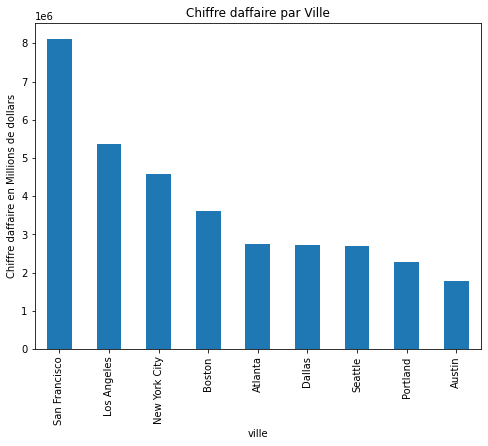

In [104]:
ca_by_ville.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Chiffre daffaire en Millions de dollars')
plt.title('Chiffre daffaire par Ville')
plt.show()

## A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

A quelle heure on vend le plus ?

In [107]:
df_clean['heure'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [108]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [111]:
df_clean.time.sort_values(ascending=False)

Order Date
2019-09-16 23:59:00    23:59:00
2019-10-19 23:59:00    23:59:00
2019-04-06 23:59:00    23:59:00
2019-05-23 23:59:00    23:59:00
2019-04-13 23:59:00    23:59:00
                         ...   
2019-07-19 00:00:00    00:00:00
2019-07-21 00:00:00    00:00:00
2019-04-02 00:00:00    00:00:00
2019-09-11 00:00:00    00:00:00
2019-03-09 00:00:00    00:00:00
Name: time, Length: 182735, dtype: object

In [112]:
df_clean.groupby('heure')['chiffre_daffaire'].sum().sort_values(ascending=False)

heure
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: chiffre_daffaire, dtype: float64

In [121]:
ca_par_heure = pd.DataFrame(df_clean.groupby('heure')['chiffre_daffaire'].sum())

In [122]:
ca_par_heure

,chiffre_daffaire
heure,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


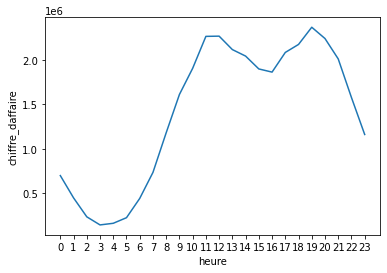

In [127]:
sns.lineplot(data=ca_par_heure['chiffre_daffaire'])
plt.xticks(ticks=range(0, 24))
plt.show()

On devrait afficher la publicité entre 10 et 11 et entre 18 et 19.

## Quels sont les produits qui sont souvent achetés ensemble ?

In [128]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [131]:
def concat_produit_par_order_id(p):
  return ";".join(p)

In [136]:
produit_ensemble = df_clean.drop_duplicates(['Order ID'])
len(produit_ensemble)

175449

In [133]:
df_clean['sales_together'] = df_clean.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

In [137]:
len(df_clean['sales_together'])

182735

In [138]:
produit_ensemble['groupby'] = df_clean.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [139]:
produit_ensemble.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time,sales_together,groupby
Order Date,,,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00,NaN,NaN
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00,NaN,NaN
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00,NaN,NaN
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00,NaN,NaN
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00,NaN,NaN


In [132]:
df_clean.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

Order ID
141234                        iPhone
141235      Lightning Charging Cable
141236              Wired Headphones
141237              27in FHD Monitor
141238              Wired Headphones
                     ...            
319666      Lightning Charging Cable
319667         AA Batteries (4-pack)
319668               Vareebadd Phone
319669              Wired Headphones
319670    Bose SoundSport Headphones
Name: Product, Length: 175449, dtype: object

In [130]:
df_clean.groupby('Order ID')['Product'].groups

{'141234': [2019-01-22 21:25:00], '141235': [2019-01-28 14:15:00], '141236': [2019-01-17 13:33:00], '141237': [2019-01-05 20:33:00], '141238': [2019-01-25 11:59:00], '141239': [2019-01-29 20:22:00], '141240': [2019-01-26 12:16:00], '141241': [2019-01-05 12:04:00], '141242': [2019-01-01 10:30:00], '141243': [2019-01-22 21:20:00], '141244': [2019-01-07 11:29:00], '141245': [2019-01-31 10:12:00], '141246': [2019-01-09 18:57:00], '141247': [2019-01-25 19:19:00], '141248': [2019-01-03 21:54:00], '141249': [2019-01-05 17:20:00], '141250': [2019-01-10 11:20:00], '141251': [2019-01-24 08:13:00], '141252': [2019-01-30 09:28:00], '141253': [2019-01-17 00:09:00], '141254': [2019-01-08 11:51:00], '141255': [2019-01-09 20:55:00], '141256': [2019-01-29 10:40:00], '141257': [2019-01-12 18:51:00], '141258': [2019-01-19 21:47:00], '141259': [2019-01-20 17:26:00], '141260': [2019-01-01 22:00:00], '141261': [2019-01-09 18:14:00], '141262': [2019-01-16 12:35:00], '141263': [2019-01-11 23:33:00], '141264':

In [ ]:
[a b c] a,b b,c a,c

In [ ]:
(usb, iphone)

In [140]:
df_clean['sales_product_together'] = df_clean.groupby('Order ID')['Product'].transform(lambda x: '; '.join(set(x)))

In [146]:
df_clean

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,chiffre_daffaire,ville,heure,time,sales_together,sales_product_together
Order Date,,,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00,NaN,Wired Headphones
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00,NaN,USB-C Charging Cable
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00,NaN,Apple Airpods Headphones
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00,NaN,AAA Batteries (4-pack)
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00,NaN,USB-C Charging Cable
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 04:13:00,304165,AAA Batteries (4-pack),1,2.99,"825 Adams St, Portland, OR 97035",January,2.99,Portland,4,04:13:00,NaN,AAA Batteries (4-pack)
2020-01-01 04:21:00,299125,USB-C Charging Cable,1,11.95,"754 Hickory St, New York City, NY 10001",January,11.95,New York City,4,04:21:00,NaN,USB-C Charging Cable
2020-01-01 04:54:00,305840,Bose SoundSport Headphones,1,99.99,"784 River St, San Francisco, CA 94016",January,99.99,San Francisco,4,04:54:00,NaN,Bose SoundSport Headphones


In [150]:
pduit = pd.DataFrame(df_clean['sales_product_together'].value_counts())
pduit

,sales_product_together
Lightning Charging Cable,19632
AAA Batteries (4-pack),19597
USB-C Charging Cable,19563
AA Batteries (4-pack),19537
Wired Headphones,16979
...,...
Google Phone; LG Dryer,2
USB-C Charging Cable; LG Dryer,2
Flatscreen TV; LG Dryer,2
LG Washing Machine; 27in FHD Monitor,2


In [160]:
pduit.index.to_list()

['Lightning Charging Cable',
 'AAA Batteries (4-pack)',
 'USB-C Charging Cable',
 'AA Batteries (4-pack)',
 'Wired Headphones',
 'Apple Airpods Headphones',
 'Bose SoundSport Headphones',
 '27in FHD Monitor',
 '27in 4K Gaming Monitor',
 '34in Ultrawide Monitor',
 'iPhone',
 'Flatscreen TV',
 'Macbook Pro Laptop',
 'ThinkPad Laptop',
 '20in Monitor',
 'Google Phone',
 'Lightning Charging Cable; iPhone',
 'Vareebadd Phone',
 'Google Phone; USB-C Charging Cable',
 'USB-C Charging Cable; Google Phone',
 'Wired Headphones; iPhone',
 'LG Washing Machine',
 'LG Dryer',
 'USB-C Charging Cable; Vareebadd Phone',
 'Google Phone; Wired Headphones',
 'iPhone; Apple Airpods Headphones',
 'Google Phone; Bose SoundSport Headphones',
 'Lightning Charging Cable; AA Batteries (4-pack)',
 'USB-C Charging Cable; AAA Batteries (4-pack)',
 'Wired Headphones; AAA Batteries (4-pack)',
 'USB-C Charging Cable; Wired Headphones',
 'Lightning Charging Cable; Wired Headphones; iPhone',
 'Lightning Charging Cable; 

In [152]:
pduit.loc[";" in pduit.index, :]

KeyError: ignored

In [143]:
df_clean.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30487
AA Batteries (4-pack)         27148
USB-C Charging Cable          23555
Lightning Charging Cable      22841
Wired Headphones              20201
Apple Airpods Headphones      15383
Bose SoundSport Headphones    13236
27in FHD Monitor               7429
iPhone                         6732
27in 4K Gaming Monitor         6134
34in Ultrawide Monitor         6076
Google Phone                   5440
Flatscreen TV                  4724
Macbook Pro Laptop             4645
20in Monitor                   4058
ThinkPad Laptop                4054
Vareebadd Phone                2023
LG Washing Machine              649
LG Dryer                        640
Name: Quantity Ordered, dtype: int64

In [170]:
def filter_number(pdu):
  return len(pdu.split(';')) > 1

In [171]:
pduit['name'] =  pduit.index

In [172]:
pduit['n'] = pduit.name.apply(filter_number)

In [173]:
pduit

,sales_product_together,name,n
Lightning Charging Cable,19632,Lightning Charging Cable,False
AAA Batteries (4-pack),19597,AAA Batteries (4-pack),False
USB-C Charging Cable,19563,USB-C Charging Cable,False
AA Batteries (4-pack),19537,AA Batteries (4-pack),False
Wired Headphones,16979,Wired Headphones,False
...,...,...,...
Google Phone; LG Dryer,2,Google Phone; LG Dryer,True
USB-C Charging Cable; LG Dryer,2,USB-C Charging Cable; LG Dryer,True
Flatscreen TV; LG Dryer,2,Flatscreen TV; LG Dryer,True
LG Washing Machine; 27in FHD Monitor,2,LG Washing Machine; 27in FHD Monitor,True


In [175]:
pduit[pduitb.n]

,sales_product_together,name,n
Lightning Charging Cable; iPhone,1747,Lightning Charging Cable; iPhone,True
Google Phone; USB-C Charging Cable,875,Google Phone; USB-C Charging Cable,True
USB-C Charging Cable; Google Phone,808,USB-C Charging Cable; Google Phone,True
Wired Headphones; iPhone,736,Wired Headphones; iPhone,True
USB-C Charging Cable; Vareebadd Phone,612,USB-C Charging Cable; Vareebadd Phone,True
...,...,...,...
Google Phone; LG Dryer,2,Google Phone; LG Dryer,True
USB-C Charging Cable; LG Dryer,2,USB-C Charging Cable; LG Dryer,True
Flatscreen TV; LG Dryer,2,Flatscreen TV; LG Dryer,True
LG Washing Machine; 27in FHD Monitor,2,LG Washing Machine; 27in FHD Monitor,True


Lightning Charging Cable; iPhone

In [ ]:
aa

In [145]:
df_clean.groupby('Product').sum()['Price Each'].sort_values()

Product
AAA Batteries (4-pack)          60676.07
AA Batteries (4-pack)           77621.76
Wired Headphones               222438.48
USB-C Charging Cable           257199.85
Lightning Charging Cable       318554.60
LG Dryer                       384000.00
LG Washing Machine             389400.00
20in Monitor                   443479.68
Vareebadd Phone                808000.00
27in FHD Monitor              1107826.14
Bose SoundSport Headphones    1310768.91
Flatscreen TV                 1411500.00
Apple Airpods Headphones      2290950.00
34in Ultrawide Monitor        2301979.42
27in 4K Gaming Monitor        2387518.78
Google Phone                  3259800.00
ThinkPad Laptop               4051959.48
iPhone                        4707500.00
Macbook Pro Laptop            7889700.00
Name: Price Each, dtype: float64